In [1]:
import pandas as pd             #import pandas with the alias pd
import numpy as np              #import numpy with the alias np
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.decomposition import PCA


from numpy.random import default_rng
# initialize a random seed such that every execution will raise same random sequences of results
rng = default_rng(seed=5)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/MLEARN/Lab/Lab2/BD_phoneme.csv", header=None)
print(df.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Columns: 257 entries, 0 to 256
dtypes: float64(256), int64(1)
memory usage: 8.8 MB
None


In [3]:
X = np.array(df.iloc[:,0:256])
print(np.shape(X))
y = np.array(df.iloc[:,256])
print(np.shape(y))
# we use broadcasting for this:
# compute a vector of feature means and subtract it from each row in X
Xm = X.mean(axis=0)
X = X - Xm
nclass = 5
nfft = 256

(4509, 256)
(4509,)


In [4]:
def lda_classifier(X_train, y_train, X_test, y_test):

  # Linear Discriminant Analysis
  lda = LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
  ldamodel = lda.fit(X_train, y_train)
  y_tpred_lda = ldamodel.predict(X_train)
  y_testpred_lda = ldamodel.predict(X_test)

  lda_train_error = 1. - accuracy_score(y_train,y_tpred_lda)
  lda_train_cmat = metrics.confusion_matrix(y_train,y_tpred_lda)

  lda_test_error = 1. - accuracy_score(y_test,y_testpred_lda)
  lda_test_cmat = metrics.confusion_matrix(y_test,y_testpred_lda)

  lda_error = np.array([lda_train_error, lda_test_error])
  lda_cmat  = np.array([lda_train_cmat, lda_test_cmat])

  return lda, lda_error, lda_cmat

def qda_classifier(X_train, y_train, X_test, y_test):
  # Quadratic Discriminant Analysis
  qda = QuadraticDiscriminantAnalysis(store_covariance=True)
  qdamodel = qda.fit(X_train, y_train)
  y_tpred_qda = qdamodel.predict(X_train)
  y_testpred_qda = qdamodel.predict(X_test)

  qda_train_error = 1. - accuracy_score(y_train,y_tpred_qda)
  qda_train_cmat = metrics.confusion_matrix(y_train,y_tpred_qda)

  qda_test_error = 1. - accuracy_score(y_test,y_testpred_qda)
  qda_test_cmat = metrics.confusion_matrix(y_test,y_testpred_qda)

  qda_error = np.array([qda_train_error, qda_test_error])
  qda_cmat  = np.array([qda_train_cmat, qda_test_cmat])

  return qda, qda_error, qda_cmat

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=5, shuffle=True, stratify = y)

In [6]:
pca_lda_train_errors = []
pca_lda_test_errors = []
pca_qda_train_errors = []
pca_qda_test_errors = []

nfeat = range(1, 256)
for i in nfeat:
  pca = PCA(n_components=i)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca  = pca.transform(X_test)

  lda, lda_error, lda_cmat = lda_classifier(X_train_pca,y_train,X_test_pca,y_test)
  qda, qda_error, qda_cmat = qda_classifier(X_train_pca,y_train,X_test_pca,y_test)

  pca_lda_train_errors.append(lda_error[0])
  pca_lda_test_errors.append(lda_error[1])
  pca_qda_train_errors.append(qda_error[0])
  pca_qda_test_errors.append(qda_error[1])

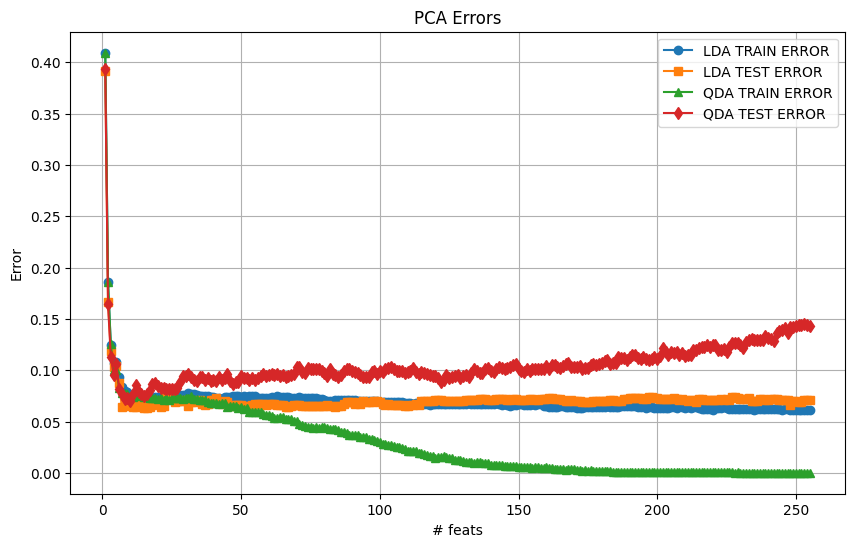

In [7]:
plt.figure(figsize=(10, 6))

# Plot each array with a label and distinct marker
plt.plot(nfeat, pca_lda_train_errors, label='LDA TRAIN ERROR', marker='o')  # Circle marker
plt.plot(nfeat, pca_lda_test_errors, label='LDA TEST ERROR', marker='s')  # Square marker
plt.plot(nfeat, pca_qda_train_errors, label='QDA TRAIN ERROR', marker='^')  # Triangle marker
plt.plot(nfeat, pca_qda_test_errors, label='QDA TEST ERROR', marker='d')  # Diamond marker

plt.title('PCA Errors')
plt.xlabel('# feats')
plt.ylabel('Error')

# Add a grid for better readability
plt.grid(True)

# Add a legend to differentiate the arrays
plt.legend()

# Display the plot
plt.show()

In [8]:

mda_lda_train_errors = []
mda_lda_test_errors = []
mda_qda_train_errors = []
mda_qda_test_errors = []

nfeat_mda = range(1, 5)
for i in nfeat_mda:
  mda = LinearDiscriminantAnalysis(n_components=i)
  mda.fit(X_train, y_train)
  X_train_mda = mda.transform(X_train)
  X_test_mda  = mda.transform(X_test)

  lda, lda_error, lda_cmat = lda_classifier(X_train_mda,y_train,X_test_mda,y_test)
  qda, qda_error, qda_cmat = qda_classifier(X_train_mda,y_train,X_test_mda,y_test)
  mda_lda_train_errors.append(lda_error[0])
  mda_lda_test_errors.append(lda_error[1])
  mda_qda_train_errors.append(qda_error[0])
  mda_qda_test_errors.append(qda_error[1])

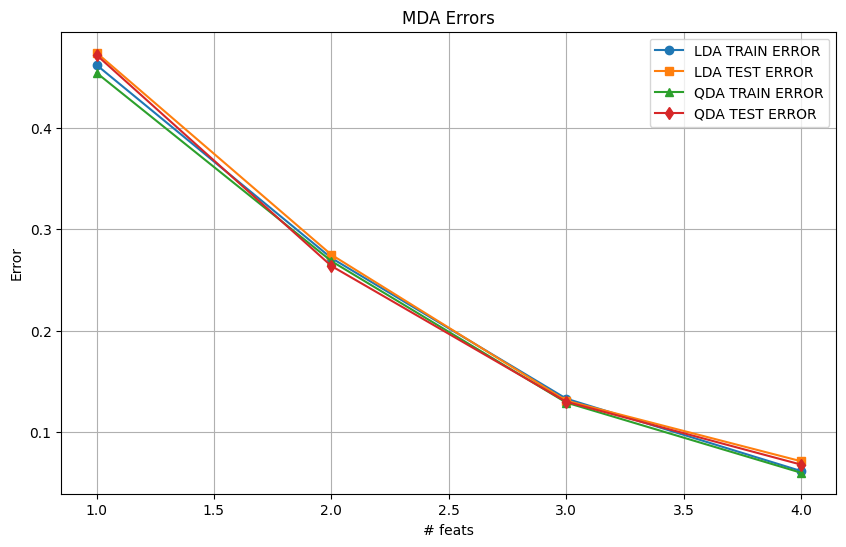

In [9]:
plt.figure(figsize=(10, 6))
# Plot each array with a label and distinct marker
plt.plot(nfeat_mda, mda_lda_train_errors, label='LDA TRAIN ERROR', marker='o')  # Circle marker
plt.plot(nfeat_mda, mda_lda_test_errors, label='LDA TEST ERROR', marker='s')  # Square marker
plt.plot(nfeat_mda, mda_qda_train_errors, label='QDA TRAIN ERROR', marker='^')  # Triangle marker
plt.plot(nfeat_mda, mda_qda_test_errors, label='QDA TEST ERROR', marker='d')  # Diamond marker

# Add title and labels
plt.title('MDA Errors')
plt.xlabel('# feats')
plt.ylabel('Error')

# Add a grid for better readability
plt.grid(True)

# Add a legend to differentiate the arrays
plt.legend()

# Display the plot
plt.show()

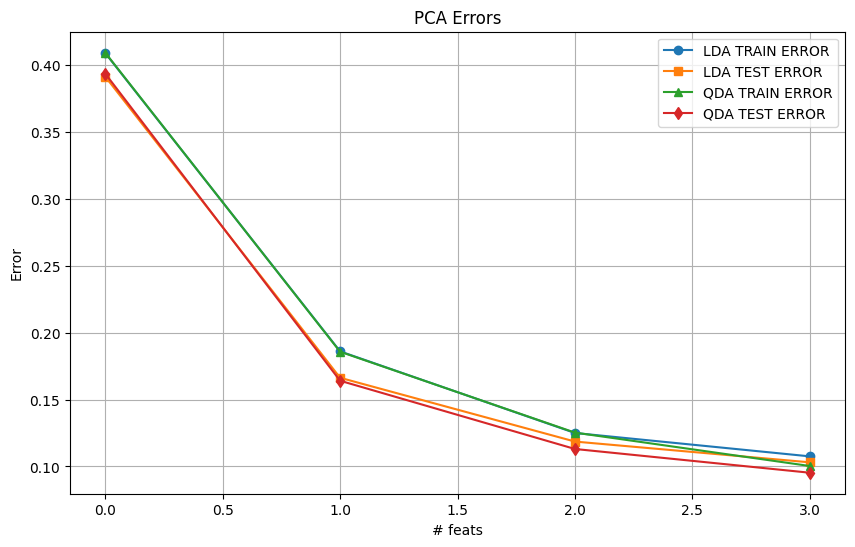

In [10]:
plt.figure(figsize=(10, 6))
nclassminusone = 5 - 1;
# Plot each array with a label and distinct marker
plt.plot(range(0,nclassminusone), pca_lda_train_errors[:nclassminusone], label='LDA TRAIN ERROR', marker='o')  # Circle marker
plt.plot(range(0,nclassminusone), pca_lda_test_errors[:nclassminusone], label='LDA TEST ERROR', marker='s')  # Square marker
plt.plot(range(0,nclassminusone), pca_qda_train_errors[:nclassminusone], label='QDA TRAIN ERROR', marker='^')  # Triangle marker
plt.plot(range(0,nclassminusone), pca_qda_test_errors[:nclassminusone], label='QDA TEST ERROR', marker='d')  # Diamond marker

plt.title('PCA Errors')
plt.xlabel('# feats')
plt.ylabel('Error')

# Add a grid for better readability
plt.grid(True)

# Add a legend to differentiate the arrays
plt.legend()

# Display the plot
plt.show()

In [11]:

print(pca_lda_train_errors[:3])

[0.4089270862212365, 0.18602716939284725, 0.1250346548378154]
